SciencePlots

1、裁剪微博地理位置。居民楼建筑高层数据，shp文件+楼层高度，高底层可视范围（缓冲区），裁出对应的微博用户的评论，首选GIS软件，次用编程。
2、高度分类。小区建筑高度数据对居民楼进行分割、分类。
3、封控信息。上海封控的具体时空位置查找。


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']


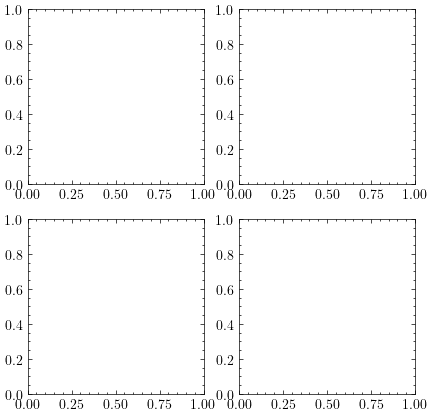

In [3]:
import matplotlib.pyplot as plt
import scienceplots
print(plt.style.available)

# 选择一个风格
plt.style.use('science')

fig, axe = plt.subplots(2, 2, figsize=(5,5))  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def model(x, p):
    return x ** (2 * p + 2) / (2 + x ** (2 * p))


x = np.linspace(0.75, 1.25, 201)

with plt.style.context(['science', 'no-latex']):
    fig, ax = plt.subplots()
    for p in [10, 15, 20, 30, 50, 100]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.set(xlabel='Voltage (mV)')
    ax.set(ylabel='Current (μA)')
    ax.autoscale(tight=True)
    fig.savefig('fig1.png', dpi=300)

with plt.style.context(['science', 'ieee', 'no-latex']):
    fig, ax = plt.subplots()
    for p in [10, 20, 50]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.set(xlabel='Voltage (mV)')
    ax.set(ylabel='Current (μA)')
    ax.autoscale(tight=True)
    fig.savefig('fig2.png', dpi=300)

with plt.style.context(['science','ieee', 'grid', 'no-latex']):
    fig, ax = plt.subplots()
    for p in [10, 20, 50]:
        ax.plot(x, model(x, p), label=p)
    ax.legend(title='Order')
    ax.set(xlabel='Voltage (mV)')
    ax.set(ylabel='Current (μA)')
    ax.autoscale(tight=True)
    fig.savefig('fig3.png', dpi=300)


合并每个月的数据

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 指定文件夹路径
folder_path = r'data/上海2019_2023年按月分类文件_情绪值'
# folder_path=r'data/杭州按月分类文件_201901_202406_情绪值'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data = data[['publish_time', 'baidu_confidence', 'baidu_negative', 'baidu_positive', 'baidu_sentiment']]
        data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)
df

C:\Users\name\AppData\Local\Temp\ipykernel_17684\2068426279.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17684\2068426279.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_17684\2068426279.py:18: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a futu

publish_time  baidu_confidence  baidu_negative  baidu_positive  \
0       2019-01-01 00:00:00          0.999354        0.000291        0.999709   
1       2019-01-01 00:00:00          0.684245        0.857910        0.142090   
2       2019-01-01 00:00:00          0.999736        0.000119        0.999881   
3       2019-01-01 00:00:00          0.999957        0.000019        0.999981   
4       2019-01-01 00:00:00          0.982733        0.007770        0.992230   
...                     ...               ...             ...             ...   
2442712 2023-12-31 23:59:00          0.995103        0.002204        0.997796   
2442713 2023-12-31 23:59:00          0.918009        0.036896        0.963104   
2442714 2023-12-31 23:59:00          0.988128        0.005342        0.994658   
2442715 2023-12-31 23:59:00          0.954968        0.020264        0.979736   
2442716 2023-12-31 23:59:00          0.951769        0.021704        0.978296   

         baidu_sentiment  
0                    2.0  
1                    0.0  
2                    2.0  
3                    2.0  
4                    2.0  
...                  ...  
2442712              2.0  
2442713              2.0  
2442714              2.0  
2442715              2.0  
2442716              2.0  

[2442717 rows x 5 columns]

进行计算后图表的绘制

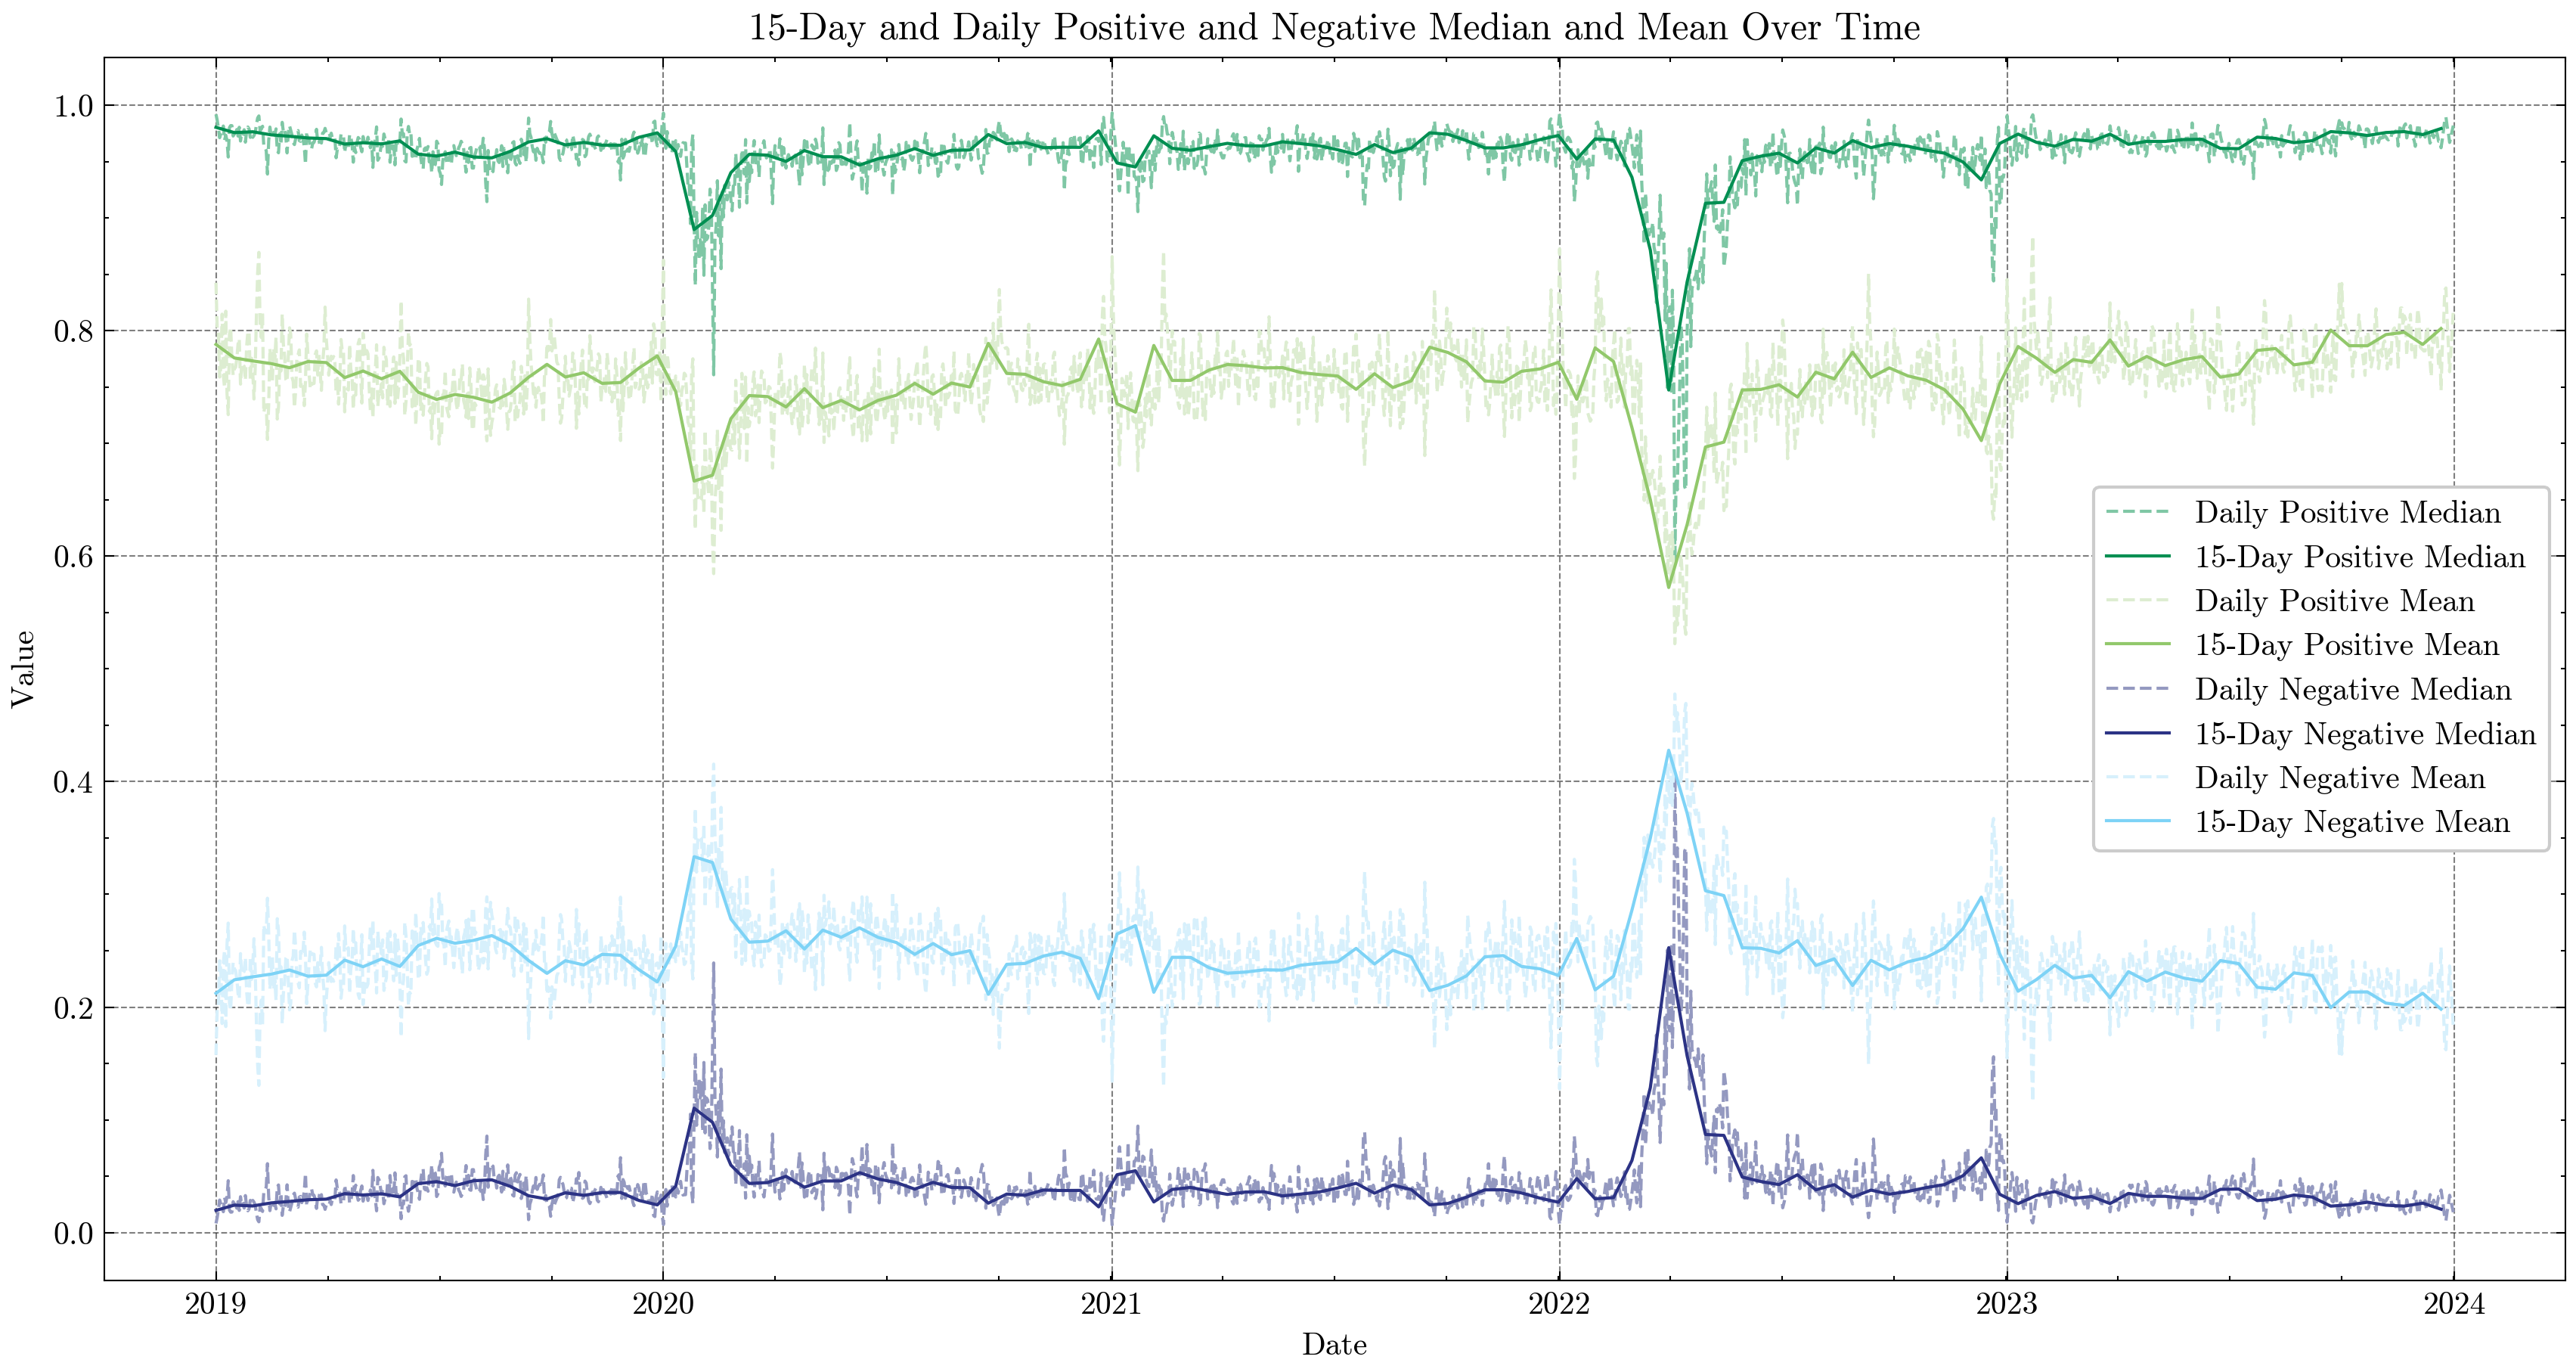

In [3]:
#############################################积极#############################################
# 按日分组，计算每日positive值的中位数和平均数
positive_daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
positive_daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']

# 将日期列转换为datetime格式
positive_daily_stats['date'] = pd.to_datetime(positive_daily_stats['date'])

# 按15天分组，计算每15天positive值的中位数和平均数
positive_fifteen_day_stats = df.groupby(pd.Grouper(key='publish_time', freq='15D')).agg({
    'baidu_positive': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
positive_fifteen_day_stats.columns = ['date', 'positive_median_fifteen_day', 'positive_mean_fifteen_day']

# 将日期列转换为datetime格式
positive_fifteen_day_stats['date'] = pd.to_datetime(positive_fifteen_day_stats['date'])

#############################################消极#############################################
# 按日分组，计算每日positive值的中位数和平均数
negative_daily_stats = df.groupby(df['publish_time'].dt.date).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
negative_daily_stats.columns = ['date', 'negative_median_daily', 'negative_mean_daily']

# 将日期列转换为datetime格式
negative_daily_stats['date'] = pd.to_datetime(negative_daily_stats['date'])

# 按15天分组，计算每15天positive值的中位数和平均数
negative_fifteen_day_stats = df.groupby(pd.Grouper(key='publish_time', freq='15D')).agg({
    'baidu_negative': ['median', 'mean']
}).reset_index()

# 重命名列以便于后续处理
negative_fifteen_day_stats.columns = ['date', 'negative_median_fifteen_day', 'negative_mean_fifteen_day']

# 将日期列转换为datetime格式
negative_fifteen_day_stats['date'] = pd.to_datetime(negative_fifteen_day_stats['date'])

# 使用science的style
with plt.style.context(['science', 'no-latex', 'grid']):
    # 绘制图表
    fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

    # 绘制按日计算的中位数曲线（虚线）
    ax.plot(positive_daily_stats['date'], positive_daily_stats['positive_median_daily'], linestyle='--', color='#7fc7a5', label='Daily Positive Median')
    # 绘制按15天计算的中位数曲线（实线）
    ax.plot(positive_fifteen_day_stats['date'], positive_fifteen_day_stats['positive_median_fifteen_day'], color='#018f52',label='15-Day Positive Median')
    # 绘制按日计算的平均数曲线（虚线）
    ax.plot(positive_daily_stats['date'], positive_daily_stats['positive_mean_daily'], linestyle='--', color='#ddedd1', label='Daily Positive Mean')
    # 绘制按15天计算的平均数曲线（实线）
    ax.plot(positive_fifteen_day_stats['date'], positive_fifteen_day_stats['positive_mean_fifteen_day'],color='#92c86b', label='15-Day Positive Mean')



    # 绘制按日计算的中位数曲线（虚线）
    ax.plot(negative_daily_stats['date'], negative_daily_stats['negative_median_daily'], linestyle='--', color='#9499c0', label='Daily Negative Median')
    # 绘制按15天计算的中位数曲线（实线）
    ax.plot(negative_fifteen_day_stats['date'], negative_fifteen_day_stats['negative_median_fifteen_day'], color='#2c3385',label='15-Day Negative Median')
    # 绘制按日计算的平均数曲线（虚线）
    ax.plot(negative_daily_stats['date'], negative_daily_stats['negative_mean_daily'], linestyle='--', color='#d7f0fc', label='Daily Negative Mean')
    # 绘制按15天计算的平均数曲线（实线）
    ax.plot(negative_fifteen_day_stats['date'], negative_fifteen_day_stats['negative_mean_fifteen_day'],color='#7ed3f6', label='15-Day Negative Mean')
    # 设置图表标题和标签
    ax.set_title('15-Day and Daily Positive and Negative Median and Mean Over Time')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

    # 显示图表
    # 保存图表
    plt.savefig(r'figure/Sentiment_over_time.png', dpi=300)
    plt.show()

# 保存数据
positive_daily_stats.to_csv('figure/Positive_daily_stats.csv', index=False, encoding='utf-8-sig')
positive_fifteen_day_stats.to_csv('figure/Positive_fifteen_day_stats.csv', index=False, encoding='utf-8-sig')
negative_daily_stats.to_csv('figure/Negative_daily_stats.csv', index=False, encoding='utf-8-sig')
negative_fifteen_day_stats.to_csv('figure/Negative_fifteen_day_stats.csv', index=False, encoding='utf-8-sig')

绘制出单独具体的月份当中的数据

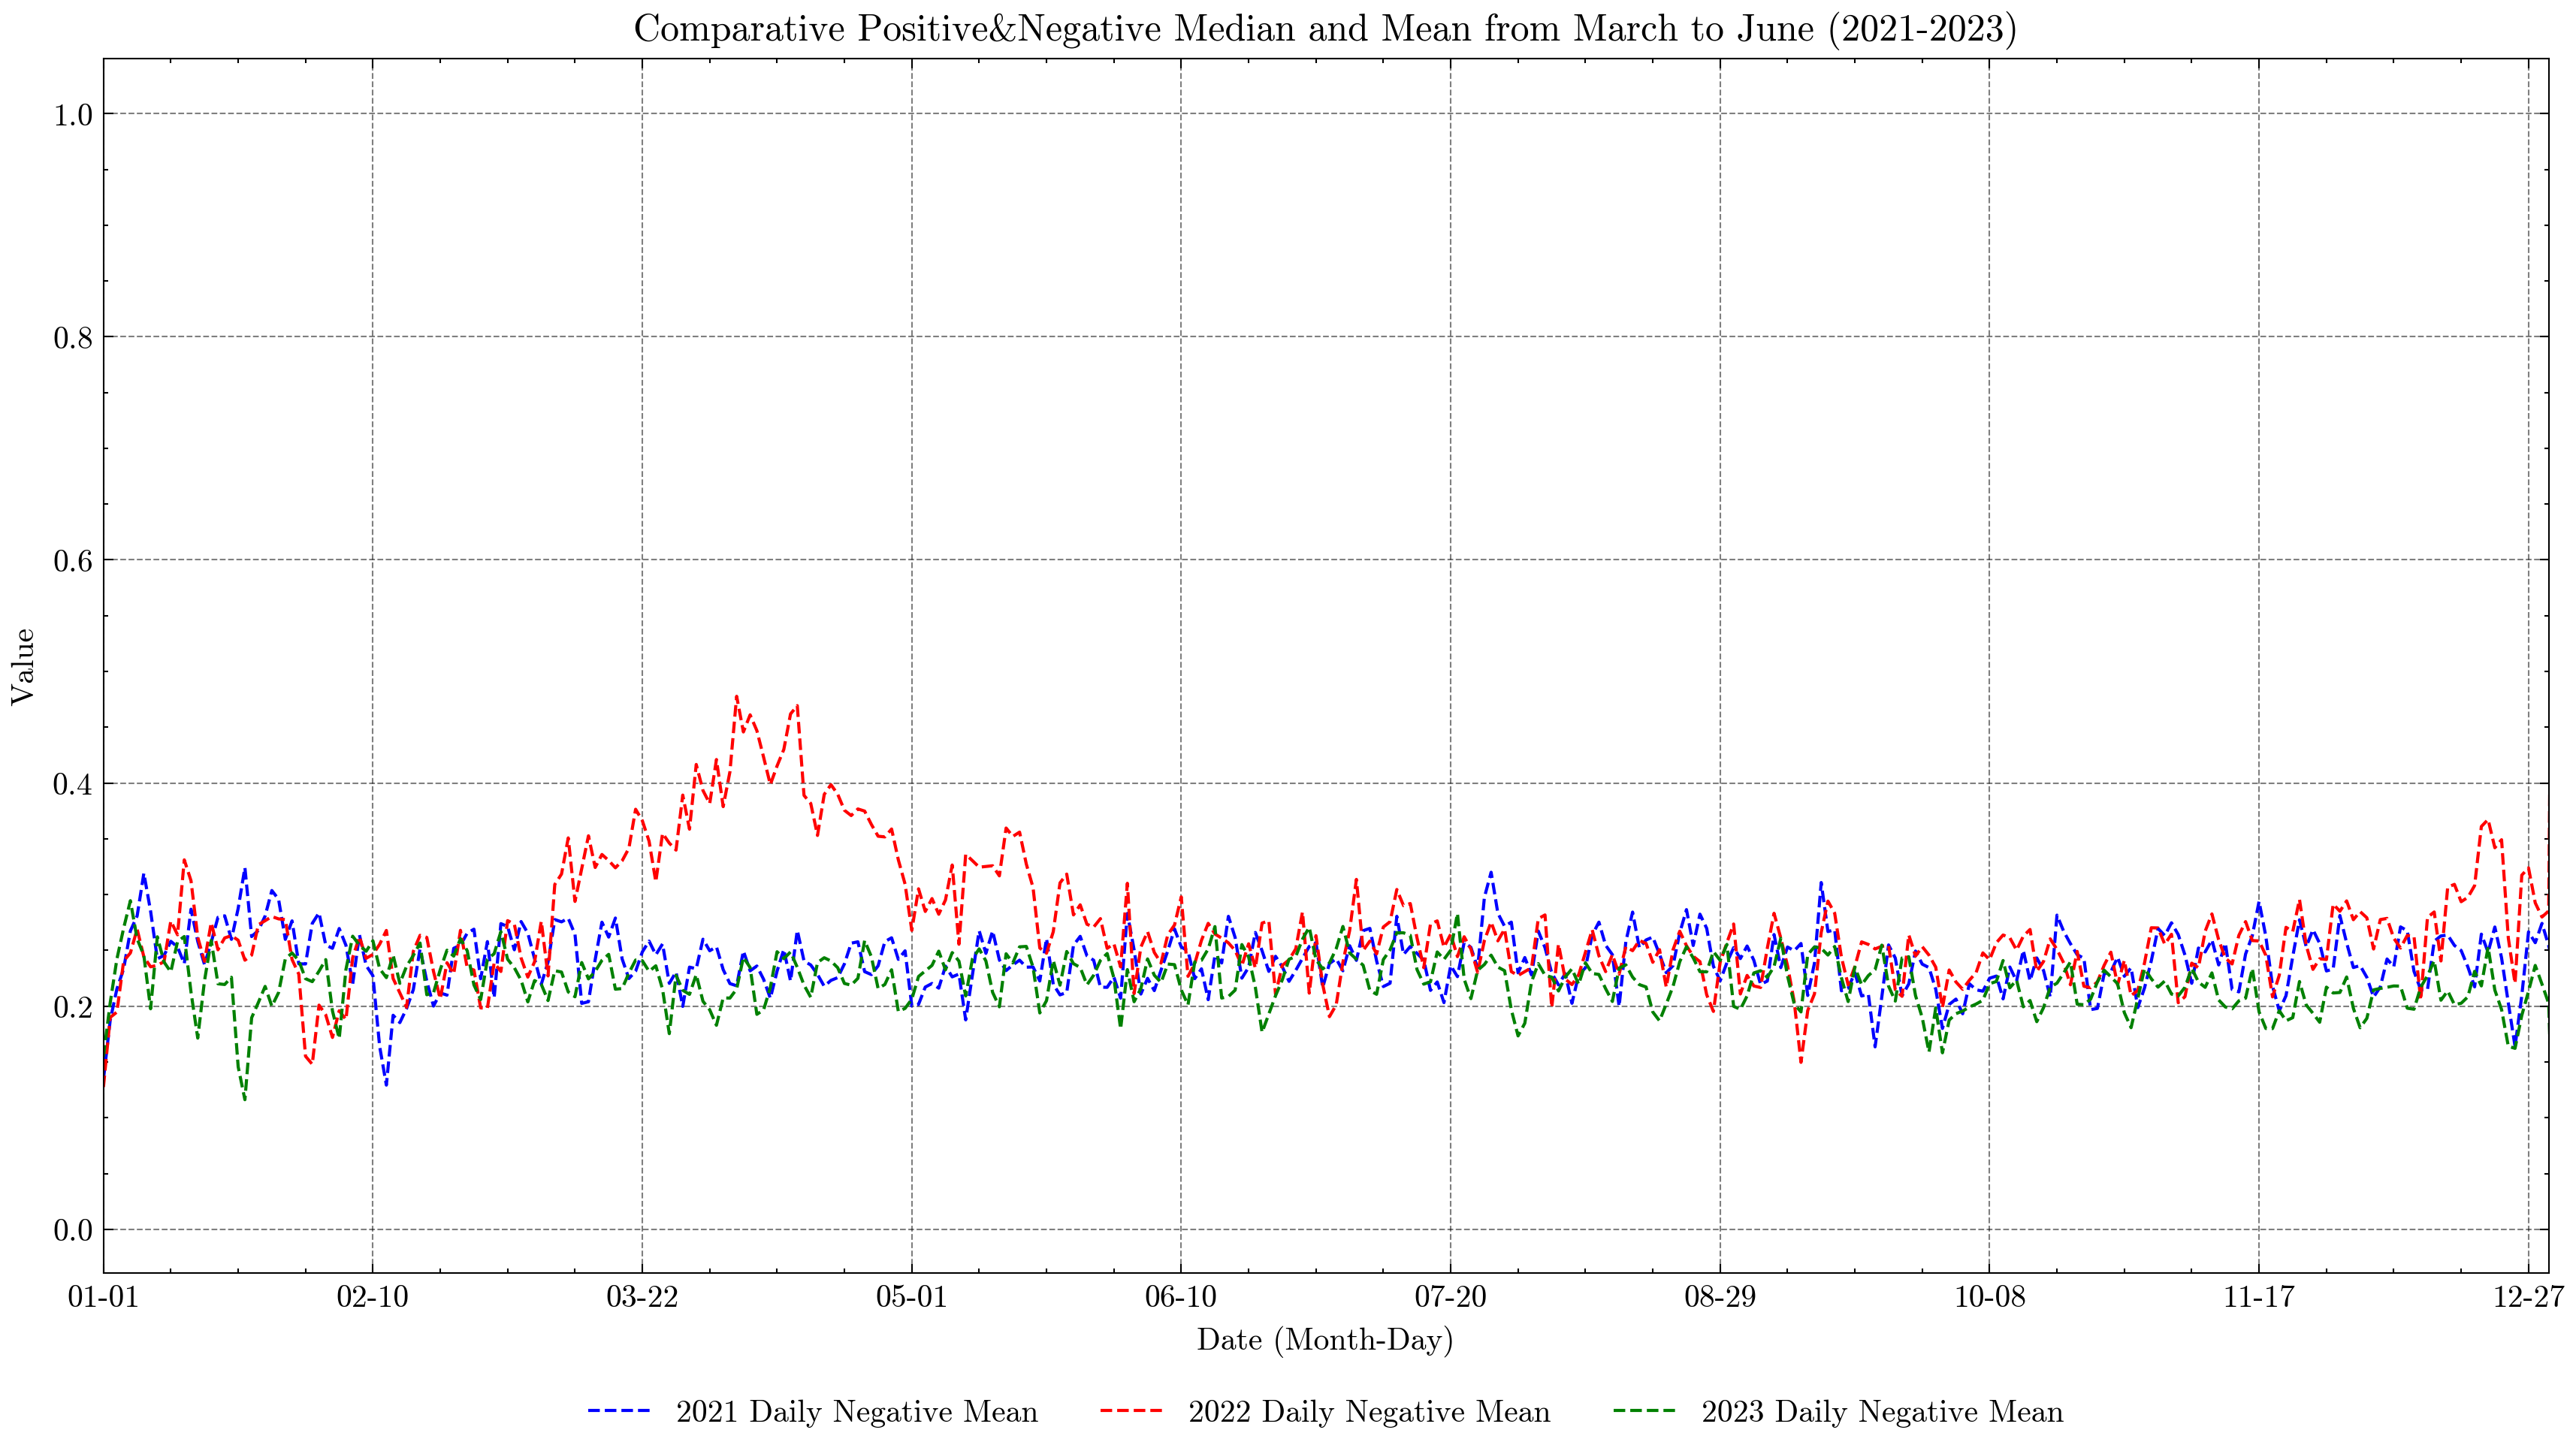

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 将数据的时间范围截取到2021年3月至2023年6月
# tmp2021 = df[(df['publish_time'] >= '2021-03-01') & (df['publish_time'] <= '2021-05-31')]
# tmp2022 = df[(df['publish_time'] >= '2022-03-01') & (df['publish_time'] <= '2022-05-31')]
# tmp2023 = df[(df['publish_time'] >= '2023-03-01') & (df['publish_time'] <= '2023-05-31')]
tmp2021 = df[(df['publish_time'] >= '2021-01-01') & (df['publish_time'] <= '2021-12-31')]
tmp2022 = df[(df['publish_time'] >= '2022-01-01') & (df['publish_time'] <= '2022-12-31')]
tmp2023 = df[(df['publish_time'] >= '2023-01-01') & (df['publish_time'] <= '2023-12-31')]

def calculate_stats(data):
    # 按日分组，计算每日positive值的中位数和平均数
    positive_daily_stats = data.groupby(data['publish_time'].dt.date).agg({
        'baidu_positive': ['median', 'mean'],
    }).reset_index()
    
    # 重命名列以便于后续处理
    positive_daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']
    
    # 将日期列转换为datetime格式
    positive_daily_stats['date'] = pd.to_datetime(positive_daily_stats['date'])

    # 重命名列以便于后续处理
    positive_daily_stats.columns = ['date', 'positive_median_daily', 'positive_mean_daily']
    
    # 将日期列转换为datetime格式
    positive_daily_stats['date'] = pd.to_datetime(positive_daily_stats['date'])
    
    #+++++++++++++++++++++++========================

    # 按日分组，计算每日positive值的中位数和平均数
    negative_daily_stats = data.groupby(data['publish_time'].dt.date).agg({
        'baidu_negative': ['median', 'mean'],
    }).reset_index()
    
    # 重命名列以便于后续处理
    negative_daily_stats.columns = ['date', 'negative_median_daily', 'negative_mean_daily']
    
    # 将日期列转换为datetime格式
    negative_daily_stats['date'] = pd.to_datetime(negative_daily_stats['date'])

    # 重命名列以便于后续处理
    negative_daily_stats.columns = ['date', 'negative_median_daily', 'negative_mean_daily']
    
    # 将日期列转换为datetime格式
    negative_daily_stats['date'] = pd.to_datetime(negative_daily_stats['date'])

    return positive_daily_stats,negative_daily_stats

# 计算各年份的统计数据
positive_daily_stats_2021 , negative_daily_stats_2021 = calculate_stats(tmp2021)
positive_daily_stats_2022 , negative_daily_stats_2022= calculate_stats(tmp2022)
positive_daily_stats_2023 , negative_daily_stats_2023= calculate_stats(tmp2023)

# 获取ticks的位置和显示的日期标签
ticks = range(len(positive_daily_stats_2021['date']))  # ticks的范围与日期长度一致
labels = positive_daily_stats_2021['date'].tolist()  # 直接使用日期字符串的列表作为标签

# 使用science的style
with plt.style.context(['science', 'no-latex', 'grid']):
    # 绘制图表
    fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

    # 将日期格式化为“月-日”
    positive_daily_stats_2021['date'] = positive_daily_stats_2021['date'].dt.strftime('%m-%d')
    positive_daily_stats_2022['date'] = positive_daily_stats_2022['date'].dt.strftime('%m-%d')
    positive_daily_stats_2023['date'] = positive_daily_stats_2023['date'].dt.strftime('%m-%d')
    # 将日期格式化为“月-日”
    negative_daily_stats_2021['date'] = negative_daily_stats_2021['date'].dt.strftime('%m-%d')
    negative_daily_stats_2022['date'] = negative_daily_stats_2022['date'].dt.strftime('%m-%d')
    negative_daily_stats_2023['date'] = negative_daily_stats_2023['date'].dt.strftime('%m-%d')

    #################################################积极
    # 绘制2021年的数据
#     ax.plot(positive_daily_stats_2021['date'], positive_daily_stats_2021['positive_median_daily'],
#             linestyle='--', label='2021 Daily Positive Median', color='blue')
    # ax.plot(positive_daily_stats_2021['date'], positive_daily_stats_2021['positive_mean_daily'],
    #         linestyle='--', label='2021 Daily Positive Mean', color='darkblue')

    # 绘制2022年的数据
#     ax.plot(positive_daily_stats_2022['date'], positive_daily_stats_2022['positive_median_daily'],
#             linestyle='--', label='2022 Daily Positive Median', color='green')
    # ax.plot(positive_daily_stats_2022['date'], positive_daily_stats_2022['positive_mean_daily'],
    #         linestyle='--', label='2022 Daily Positive Mean', color='green')

    # 绘制2023年的数据
#     ax.plot(positive_daily_stats_2023['date'], positive_daily_stats_2023['positive_median_daily'],
#             linestyle='--', label='2023 Daily Positive Median', color='red')
    # ax.plot(positive_daily_stats_2023['date'], positive_daily_stats_2023['positive_mean_daily'],
    #         linestyle='--', label='2023 Daily Positive Mean', color='darkred')
    #################################################消极
    # 绘制2021年的数据
#     ax.plot(negative_daily_stats_2021['date'], negative_daily_stats_2021['negative_median_daily'],
#             linestyle='--', label='2021 Daily Negative Median', color='blue')
    ax.plot(negative_daily_stats_2021['date'], negative_daily_stats_2021['negative_mean_daily'],
            linestyle='--', label='2021 Daily Negative Mean', color='blue')

    # 绘制2022年的数据
#     ax.plot(negative_daily_stats_2022['date'], negative_daily_stats_2022['negative_median_daily'],
#             linestyle='--', label='2022 Daily Negative Median', color='darkgreen')
    ax.plot(negative_daily_stats_2022['date'], negative_daily_stats_2022['negative_mean_daily'],
            linestyle='--', label='2022 Daily Negative Mean', color='red')

    # 绘制2023年的数据
#     ax.plot(negative_daily_stats_2023['date'], negative_daily_stats_2023['negative_median_daily'],
#             linestyle='--', label='2023 Daily Negative Median', color='red')
    ax.plot(negative_daily_stats_2023['date'], negative_daily_stats_2023['negative_mean_daily'],
            linestyle='--', label='2023 Daily Negative Mean', color='green')

    # 设置图表标题和标签
    ax.set_title('Comparative Positive&Negative Median and Mean from March to June (2021-2023)')
    ax.set_xlabel('Date (Month-Day)')
    ax.set_ylabel('Value')
    ax.legend()

    # 设置横轴刻度只显示月份
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
    # 设置图的横轴右边界为12-30
    ax.set_xlim(xmin=0, xmax=len(positive_daily_stats_2021['date'])-2)

    # 图例横着放在最下方，去除背景边框
    plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

    # 显示图表
    plt.show()


情绪小数值

引言 从大问题引入到小问题

### 1、	上海封控的具体时间 22年3、4、5月左右
### 2、	小区数据 筛选落在小区范围内的 符合封控时间的weibo
### 3、	统计学数量 阈值个数 大于30/20/15个
### 4、	周边绿地 
#### ①	缓冲范围的NDVI的平均值 
#### ②	缓冲范围内的 林地面积 
#### ③	缓冲范围内的 草地水体面积
### 5、量化小区绿地可视性的值 与 建筑物高度/密度 、周边绿地 关系


### 视域分析   面/点   范围内的绿地面积

C:\Users\name\AppData\Local\Temp\ipykernel_13888\1832766753.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\1832766753.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\1832766753.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a futu

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'bright', 'cjk-jp-font', 'cjk-kr-font', 'cjk-sc-font', 'cjk-tc-font', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'grid', 'high-contrast', 'high-vis', 'ieee', 'latex-sans', 'light', 'muted', 'nature', 'no-latex', 'notebook', 'pgf', 'retro', 'russian-font', 'sans', 'scatter', 'science', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'std-colors', 'tableau-colorblind10', 'turkish-font', 'vibrant']
103890
147747


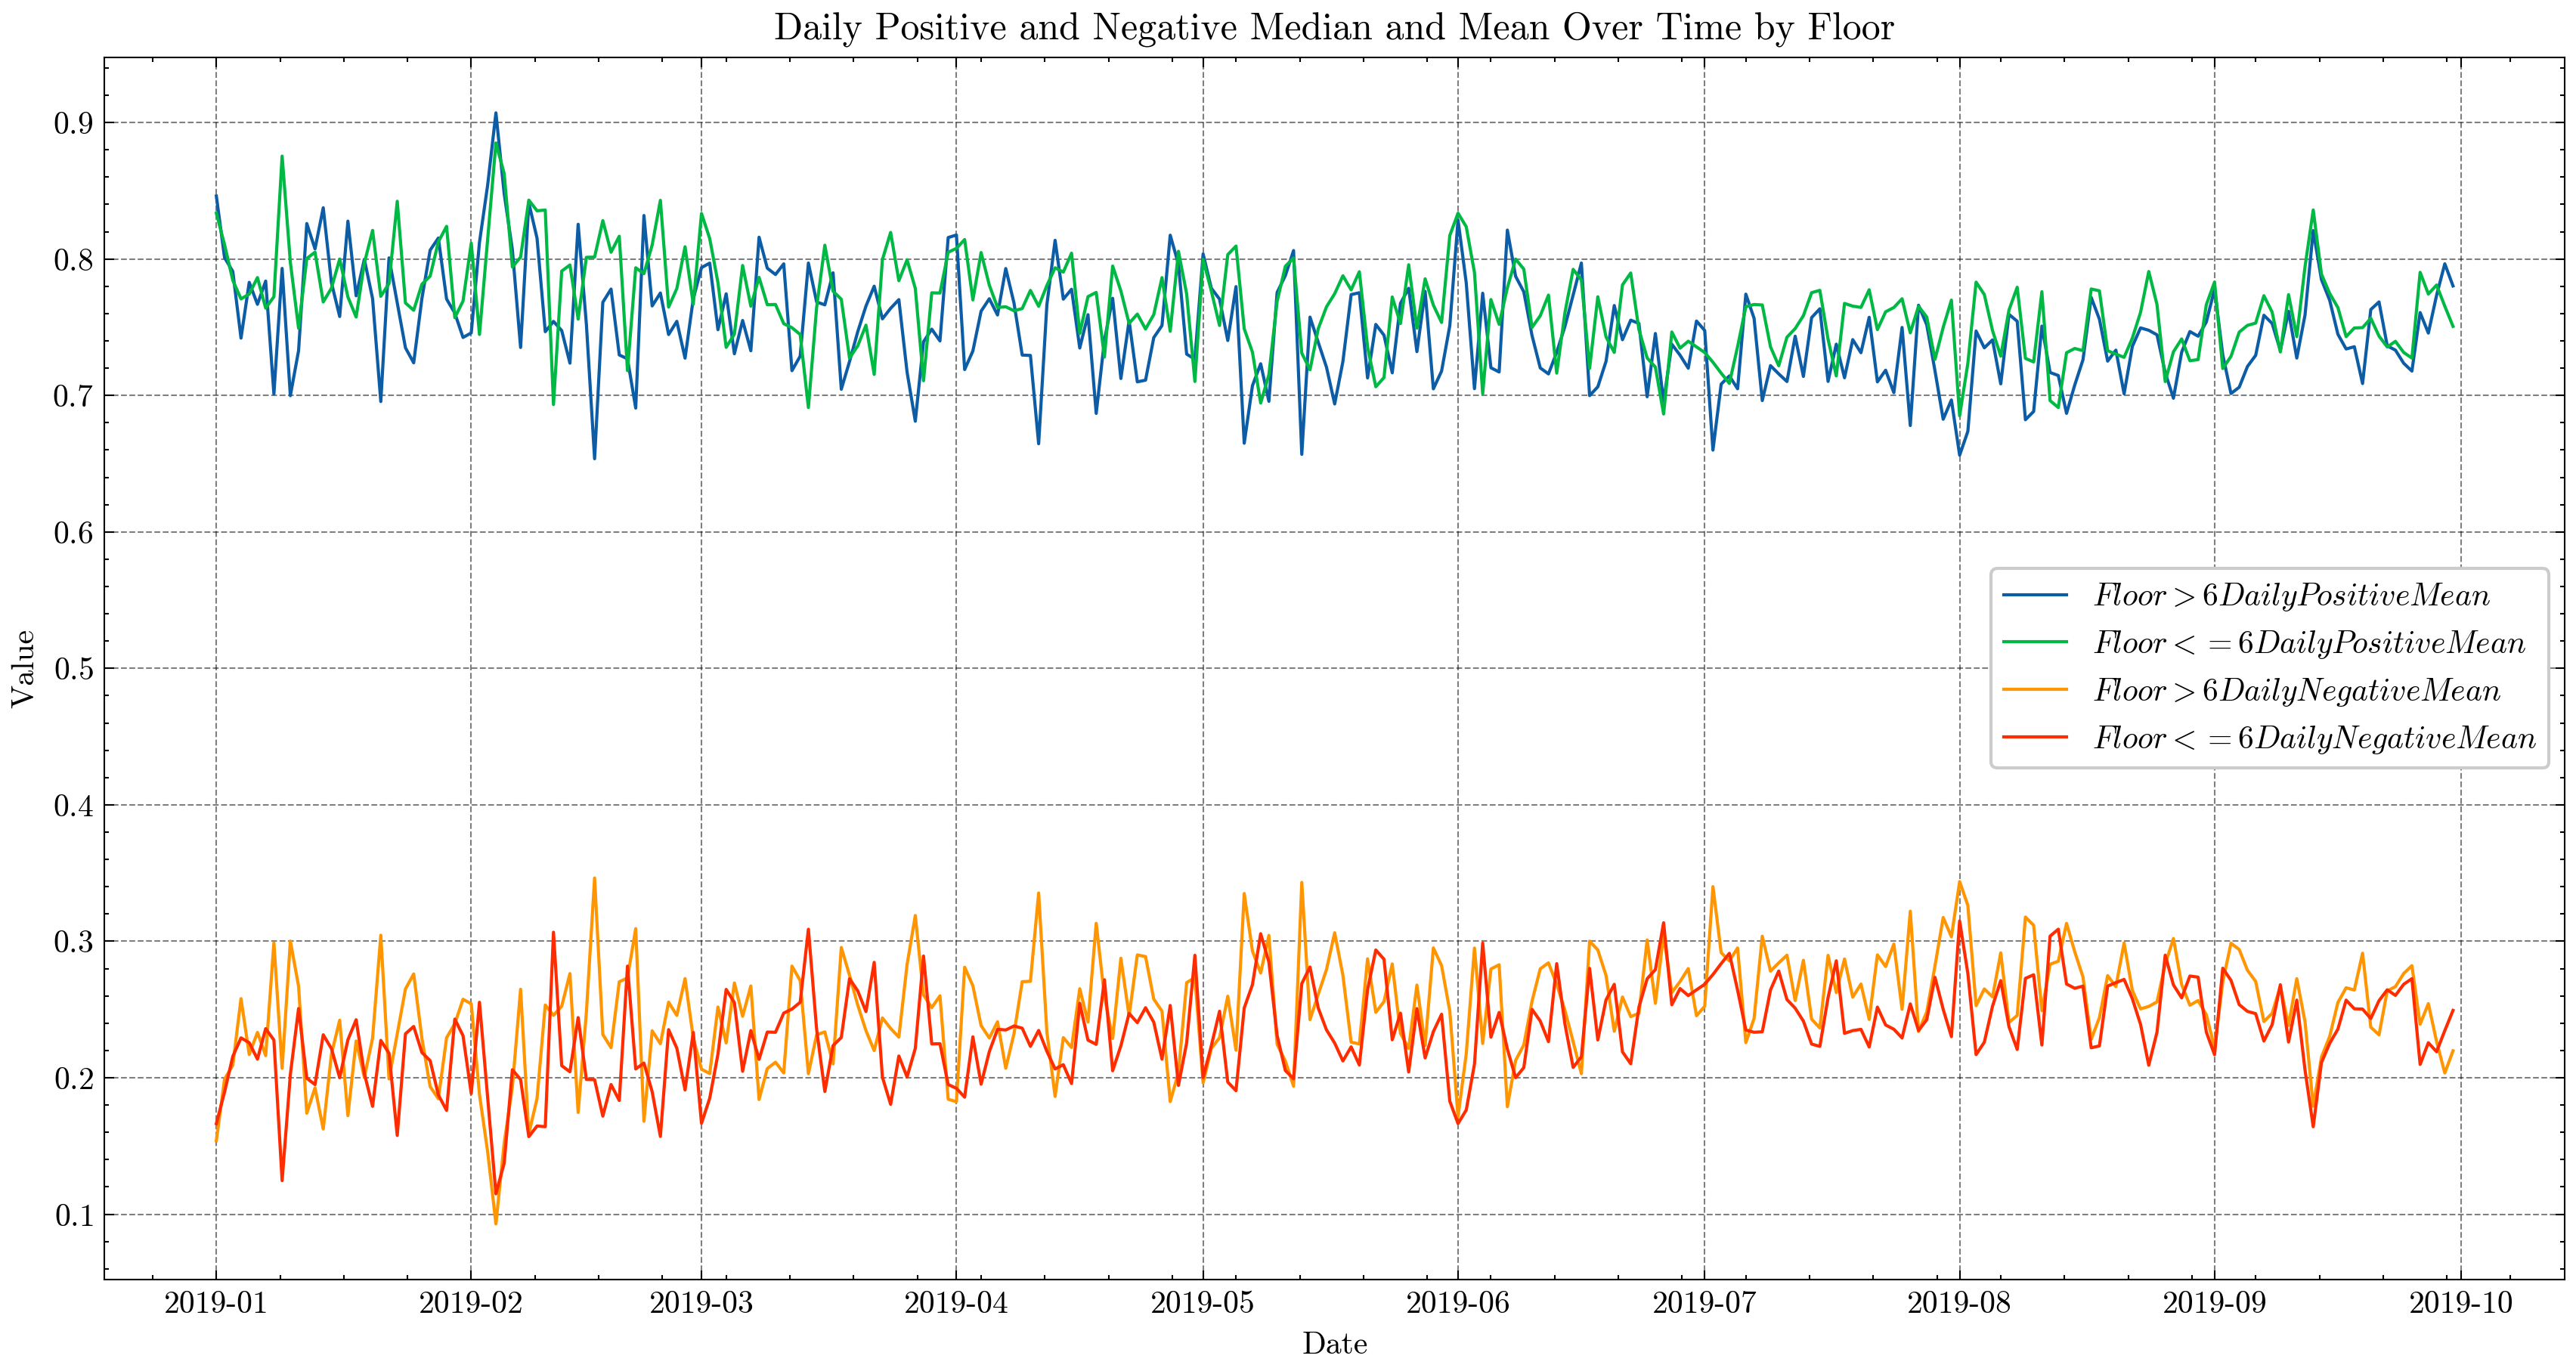

积极 独立T检验结果: t统计量 = -13.145475349029915, p值 = 1.861679129783809e-39
消极 独立T检验结果: t统计量 = 13.145476064006159, p值 = 1.8616615444584945e-39


C:\Users\name\AppData\Local\Temp\ipykernel_13888\1832766753.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([df_floor_gt_6['baidu_positive'], df_floor_lte_6['baidu_positive']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\1832766753.py:117: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([df_floor_gt_6['baidu_negative'], df_floor_lte_6['baidu_negative']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)


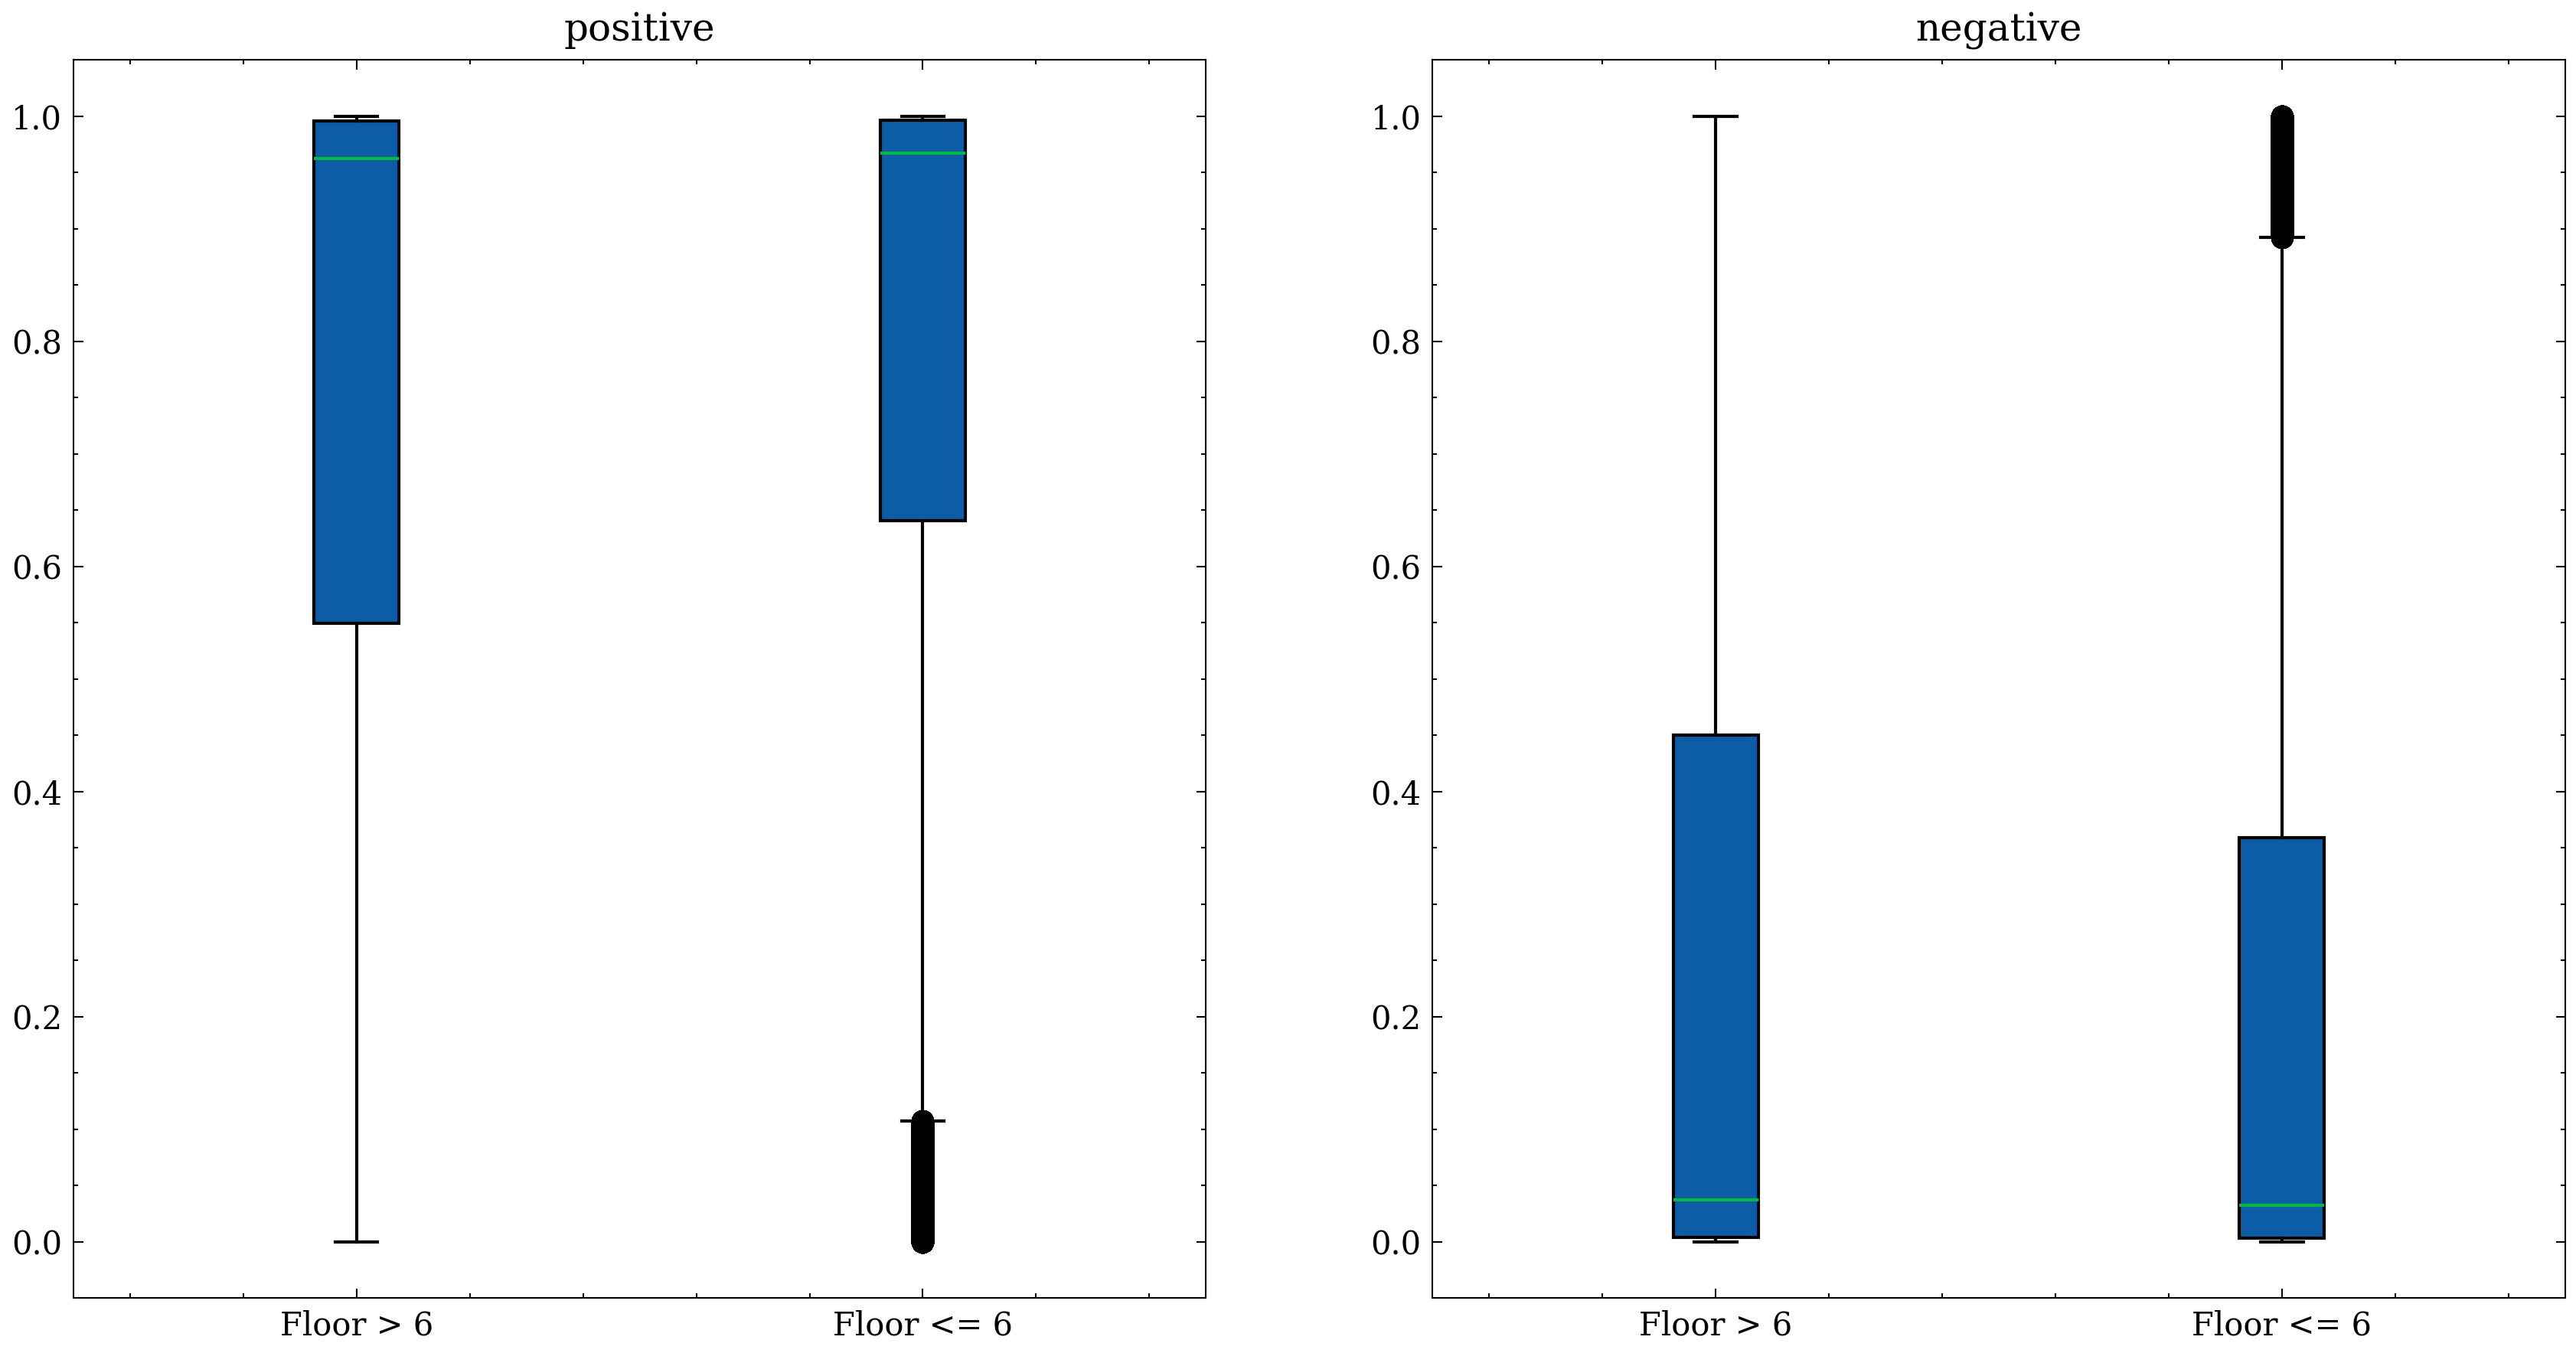

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 指定文件夹路径
folder_path = r'out/buffer'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data = data[['publish_time', 'baidu_confidence', 'baidu_negative', 'baidu_positive', 'baidu_sentiment','Floor']]
        data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)
df

import pandas as pd
import matplotlib.pyplot as plt

import scienceplots
print(plt.style.available)

# 选择一个风格
plt.style.use('science')

# 设置正确显示大于号小于号
plt.rcParams['axes.unicode_minus'] = False

# 读取CSV文件
# df = pd.read_csv('20190201_20190301 Residents.csv', parse_dates=['publish_time'])

# 根据Floor列的值将数据分成两类
df_floor_gt_6 = df[df['Floor'] > 6]
print(len(df_floor_gt_6))
df_floor_lte_6 = df[df['Floor'] <= 6]
print(len(df_floor_lte_6))

# 定义一个函数来计算中位数和平均数
def calculate_daily_stats(df, sentiment_col):
    daily_stats = df.groupby(df['publish_time'].dt.date).agg({
        sentiment_col: ['median', 'mean']
    }).reset_index()
    daily_stats.columns = ['date', f'{sentiment_col}_median_daily', f'{sentiment_col}_mean_daily']
    daily_stats['date'] = pd.to_datetime(daily_stats['date'])
    return daily_stats

# 计算两类数据的中位数和平均数
positive_daily_stats_gt_6 = calculate_daily_stats(df_floor_gt_6, 'baidu_positive')
positive_daily_stats_lte_6 = calculate_daily_stats(df_floor_lte_6, 'baidu_positive')

negative_daily_stats_gt_6 = calculate_daily_stats(df_floor_gt_6, 'baidu_negative')
negative_daily_stats_lte_6 = calculate_daily_stats(df_floor_lte_6, 'baidu_negative')

# 使用science的style
with plt.style.context(['science', 'no-latex', 'grid']):
    # 绘制图表
    fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

    # 绘制Floor大于6的数据
    # ax.plot(positive_daily_stats_gt_6['date'], positive_daily_stats_gt_6['baidu_positive_median_daily'],  label=r'$Floor > 6 Daily Positive Median$')
    ax.plot(positive_daily_stats_gt_6['date'], positive_daily_stats_gt_6['baidu_positive_mean_daily'],  label='$Floor > 6 Daily Positive Mean$')
    ax.plot(positive_daily_stats_lte_6['date'], positive_daily_stats_lte_6['baidu_positive_mean_daily'],  label='$Floor <= 6 Daily Positive Mean$')
    ax.plot(negative_daily_stats_gt_6['date'], negative_daily_stats_gt_6['baidu_negative_mean_daily'],  label='$Floor > 6 Daily Negative Mean$')
    ax.plot(negative_daily_stats_lte_6['date'], negative_daily_stats_lte_6['baidu_negative_mean_daily'],  label='$Floor <= 6 Daily Negative Mean$')
    # ax.plot(negative_daily_stats_gt_6['date'], negative_daily_stats_gt_6['baidu_negative_median_daily'],  label=r'$Floor > 6 Daily Negative Median$')

    # 绘制Floor小于等于6的数据
    # ax.plot(positive_daily_stats_lte_6['date'], positive_daily_stats_lte_6['baidu_positive_median_daily'], label='$Floor <= 6 Daily Positive Median$')
    # ax.plot(negative_daily_stats_lte_6['date'], negative_daily_stats_lte_6['baidu_negative_median_daily'], label='$Floor <= 6 Daily Negative Median$')

    # 设置图表标题和标签
    ax.set_title('Daily Positive and Negative Median and Mean Over Time by Floor')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

    # 显示图表
    plt.savefig(r'out/tmp/Sentiment_over_time_by_floor_daily.png', dpi=300)
    plt.show()

# 保存数据
positive_daily_stats_gt_6.to_csv('out/tmp/Positive_daily_stats_gt_6.csv', index=False, encoding='utf-8-sig')
positive_daily_stats_lte_6.to_csv('out/tmp/Positive_daily_stats_lte_6.csv', index=False, encoding='utf-8-sig')
negative_daily_stats_gt_6.to_csv('out/tmp/Negative_daily_stats_gt_6.csv', index=False, encoding='utf-8-sig')
negative_daily_stats_lte_6.to_csv('out/tmp/Negative_daily_stats_lte_6.csv', index=False, encoding='utf-8-sig')

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['text.usetex'] = False # 关闭使用 latex 公式

# 对大于和小于等于6的positive作独立T检验 求出p
t_stat, p_value = ttest_ind(df_floor_gt_6['baidu_positive'], df_floor_lte_6['baidu_positive'])
print(f'积极 独立T检验结果: t统计量 = {t_stat}, p值 = {p_value}')

t_stat, p_value = ttest_ind(df_floor_gt_6['baidu_negative'], df_floor_lte_6['baidu_negative'])
print(f'消极 独立T检验结果: t统计量 = {t_stat}, p值 = {p_value}')

# 画出相应的成对箱线图（积极一对、消极一对），并标注出星号*
fig, axes = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

# 积极箱线图
bp1 = axes[0].boxplot([df_floor_gt_6['baidu_positive'], df_floor_lte_6['baidu_positive']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
axes[0].set_title('positive')

# 消极箱线图
bp2 = axes[1].boxplot([df_floor_gt_6['baidu_negative'], df_floor_lte_6['baidu_negative']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
axes[1].set_title('negative')

plt.savefig(r'out/tmp/Sentiment_boxplot_by_floor.png', dpi=300)
plt.show()



百分比

C:\Users\name\AppData\Local\Temp\ipykernel_13888\984422371.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\984422371.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\984422371.py:17: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future 

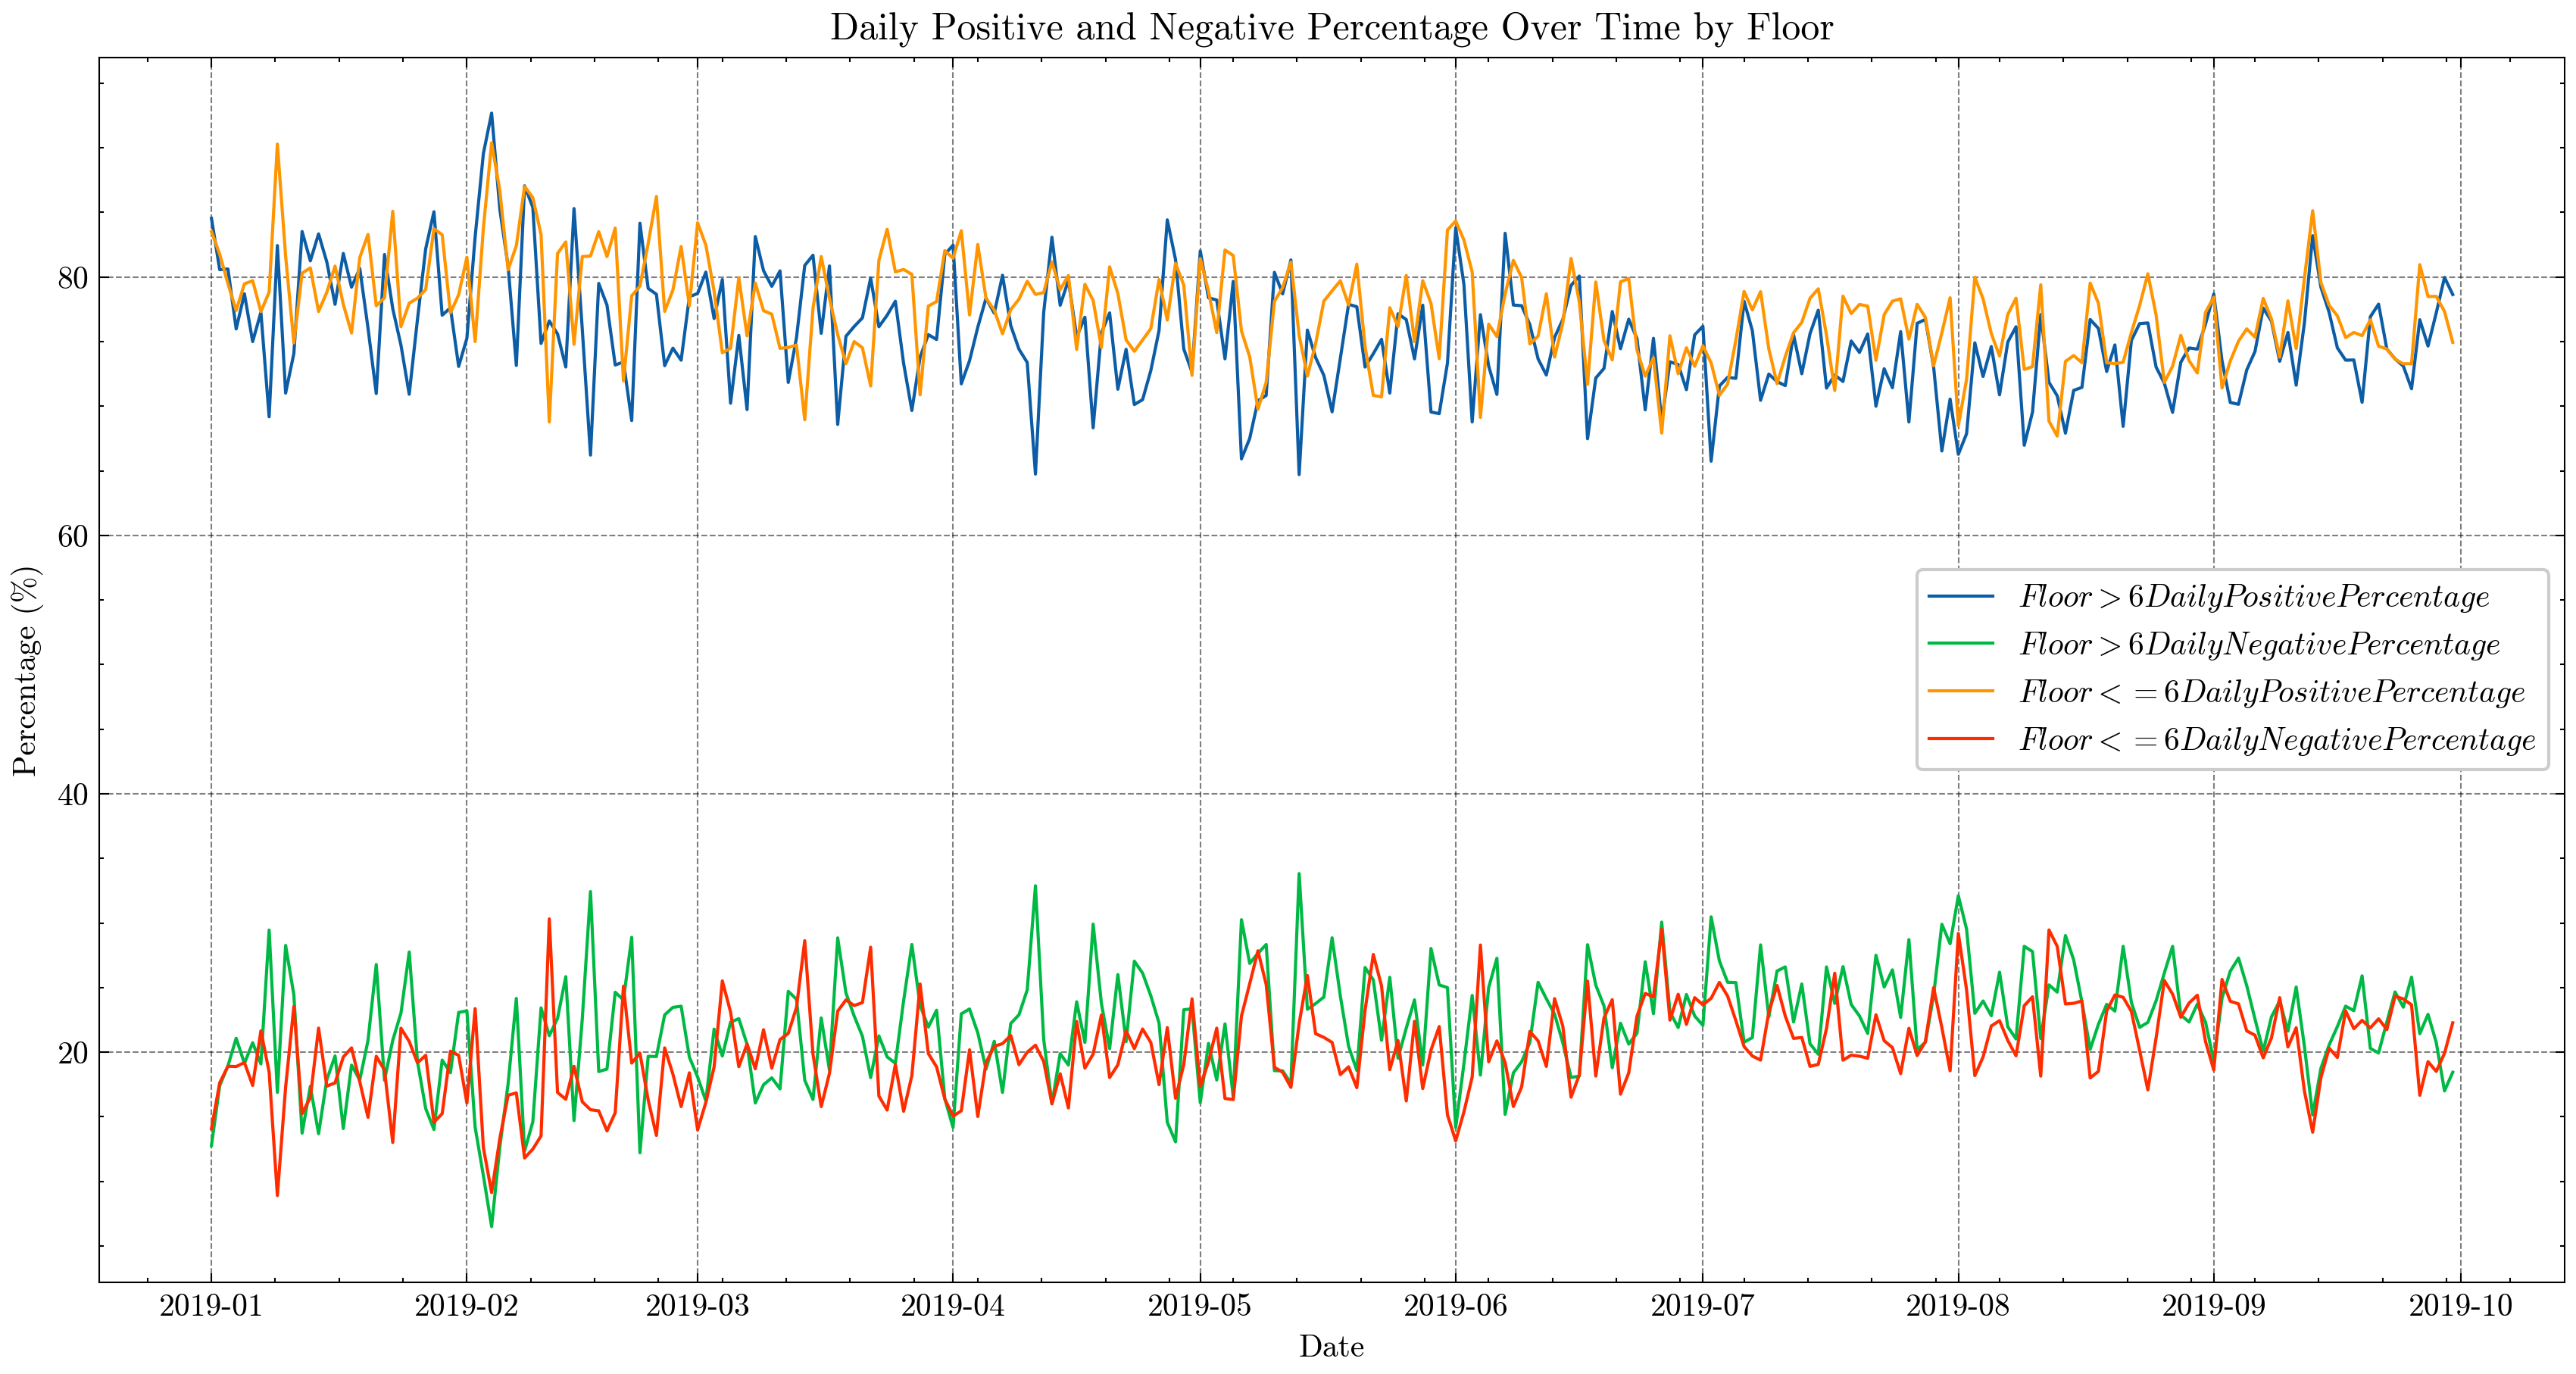

积极 独立T检验结果: t统计量 = -5.554186365075987, p值 = 4.368450788180886e-08
消极 独立T检验结果: t统计量 = 5.615009600653627, p值 = 3.137599086047741e-08


C:\Users\name\AppData\Local\Temp\ipykernel_13888\984422371.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([sentiment_percentage_gt_6['positive_percentage'], sentiment_percentage_lte_6['positive_percentage']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
C:\Users\name\AppData\Local\Temp\ipykernel_13888\984422371.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([sentiment_percentage_gt_6['negative_percentage'], sentiment_percentage_lte_6['negative_percentage']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)


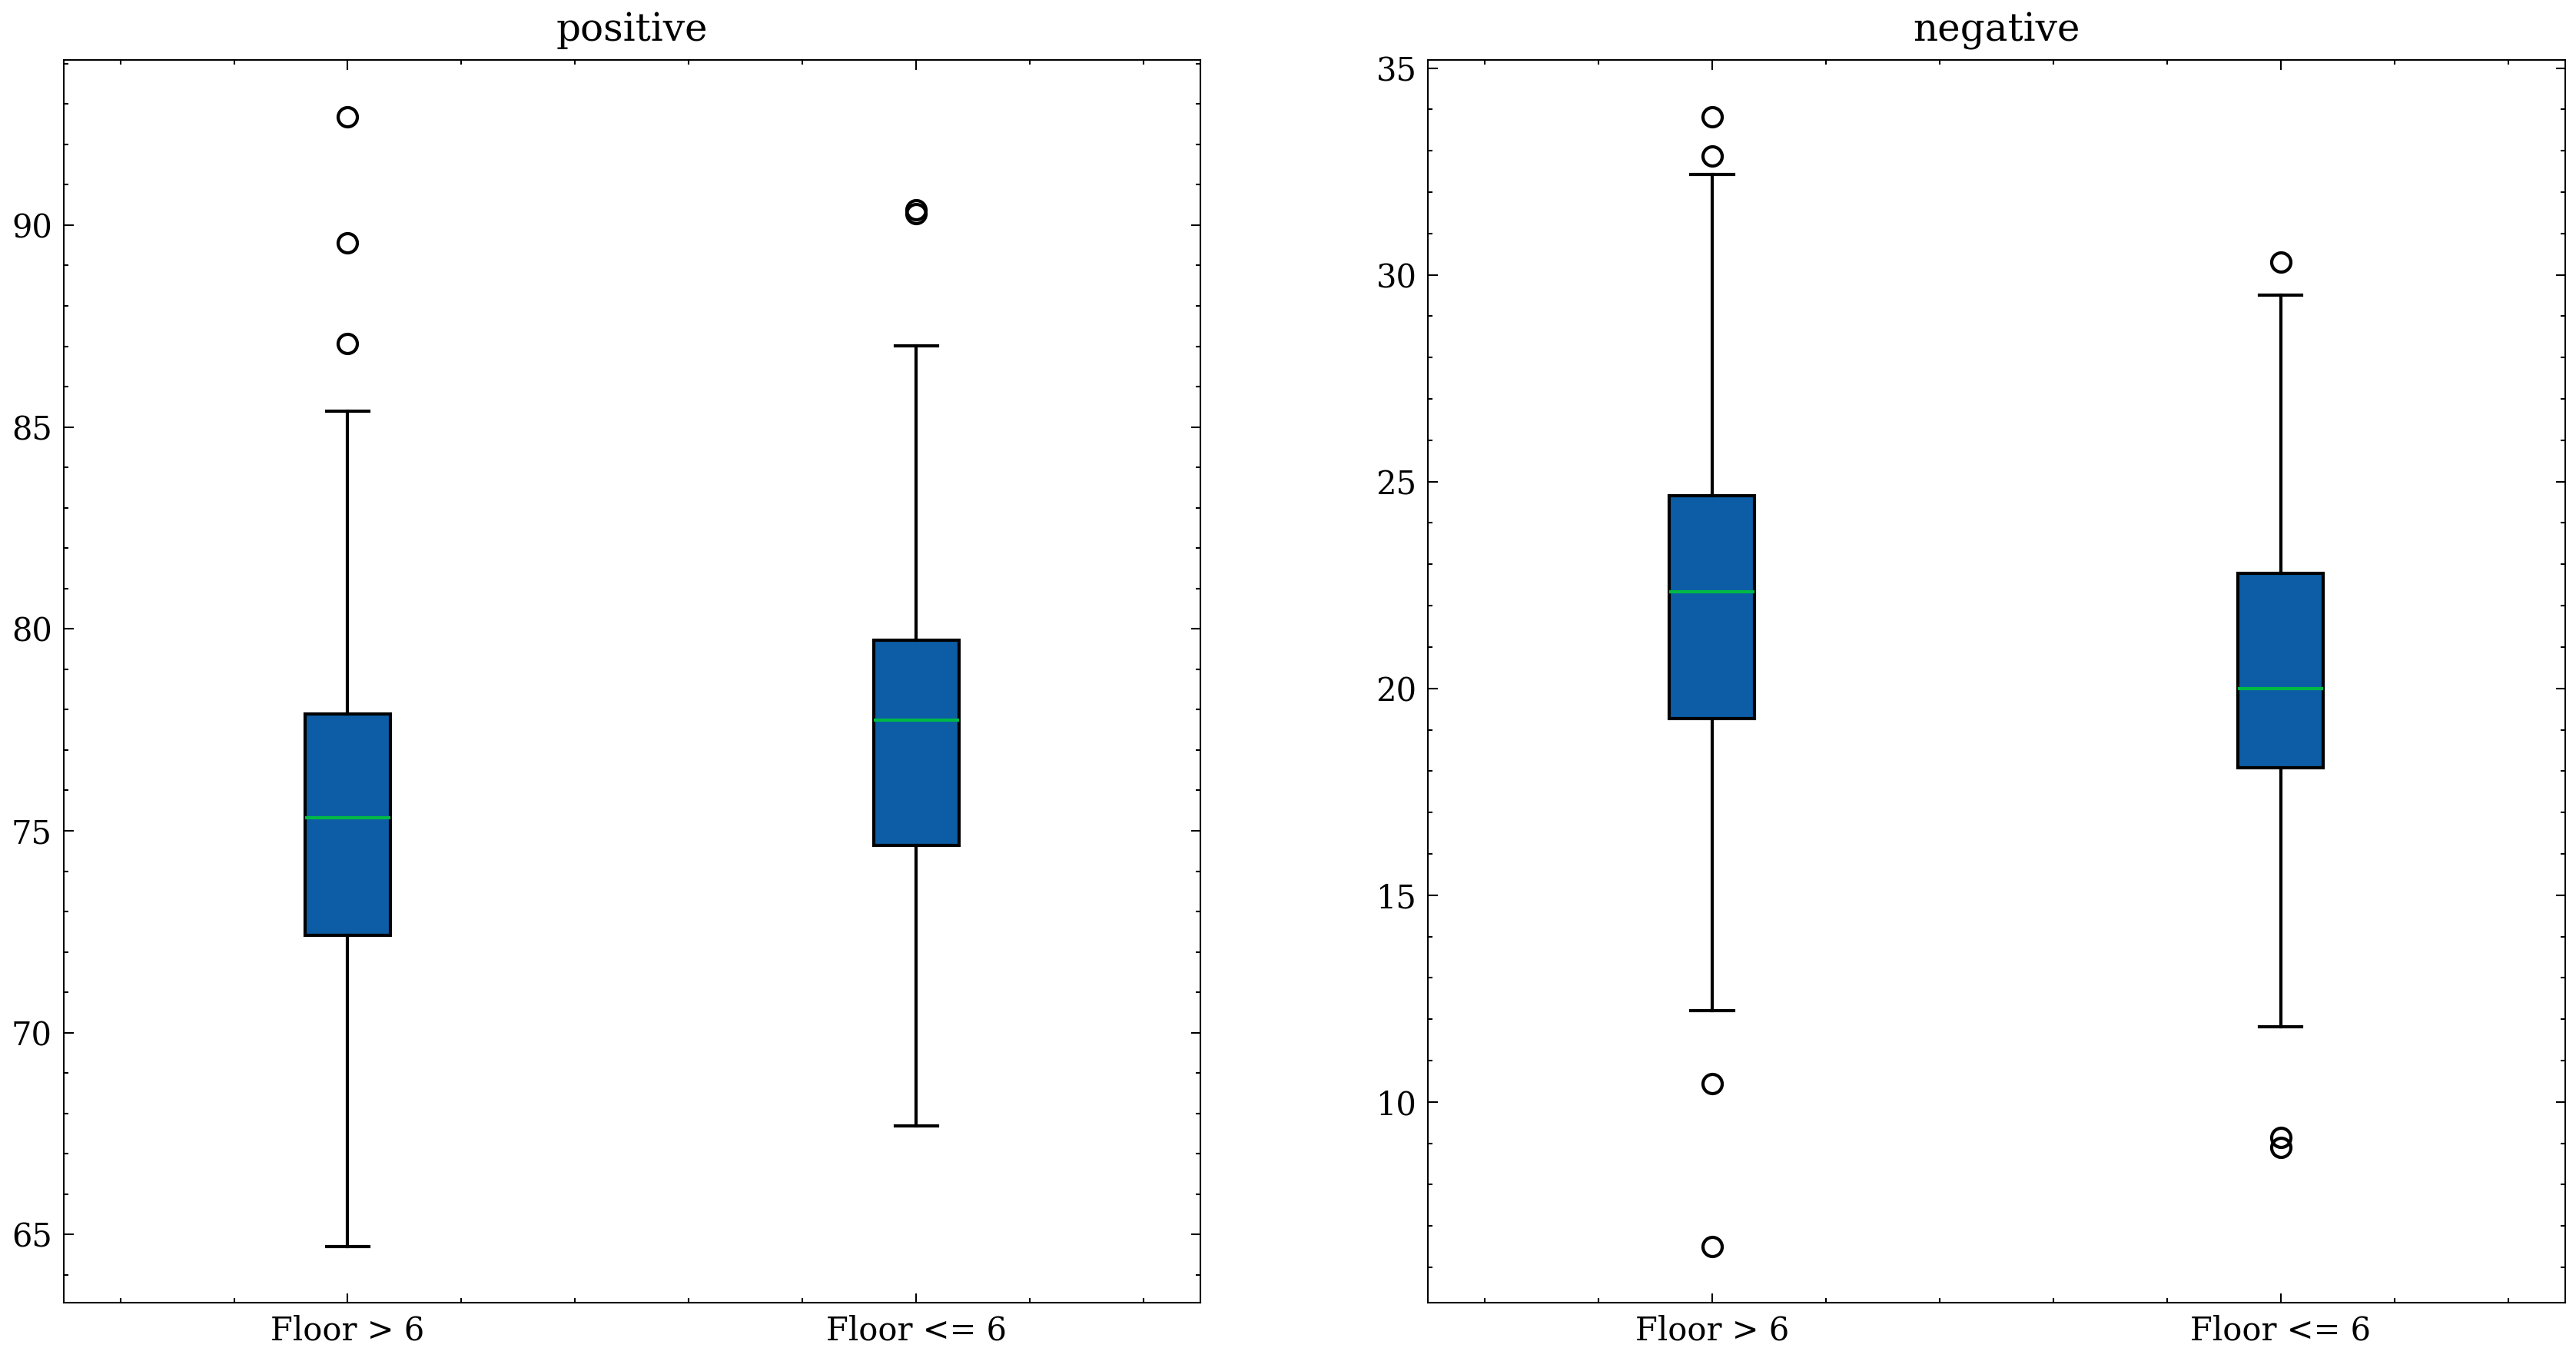

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob

# 指定文件夹路径
folder_path = r'out/buffer'

# 存储所有数据
all_data = []

# 使用glob模块遍历文件夹中的所有csv文件
for file_path in glob.glob(os.path.join(folder_path, '*.csv')):
    try:
        data = pd.read_csv(file_path)
        data = data[['publish_time', 'baidu_sentiment', 'Floor']]
        data['publish_time'] = pd.to_datetime(data['publish_time'], infer_datetime_format=True)
        all_data.append(data)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")

# 合并所有数据
df = pd.concat(all_data, ignore_index=True)

# 根据Floor列的值将数据分成两类
df_floor_gt_6 = df[df['Floor'] > 6]
df_floor_lte_6 = df[df['Floor'] <= 6]

# 定义一个函数来计算积极和消极的百分比
def calculate_daily_sentiment_percentage(df):
    daily_counts = df.groupby([df['publish_time'].dt.date, 'baidu_sentiment']).size().unstack(fill_value=0)
    daily_counts['total'] = daily_counts.sum(axis=1)
    daily_counts['positive_percentage'] = daily_counts[2] / daily_counts['total'] * 100
    daily_counts['negative_percentage'] = daily_counts[0] / daily_counts['total'] * 100
    daily_counts.reset_index(inplace=True)
    daily_counts['publish_time'] = pd.to_datetime(daily_counts['publish_time'])
    return daily_counts[['publish_time', 'positive_percentage', 'negative_percentage']]

# 计算两类数据的积极和消极百分比
sentiment_percentage_gt_6 = calculate_daily_sentiment_percentage(df_floor_gt_6)
sentiment_percentage_lte_6 = calculate_daily_sentiment_percentage(df_floor_lte_6)

# 使用science的style
with plt.style.context(['science', 'no-latex', 'grid']):
    # 绘制图表
    fig, ax = plt.subplots(figsize=(14, 7), dpi=300)

    # 绘制Floor大于6的数据
    ax.plot(sentiment_percentage_gt_6['publish_time'], sentiment_percentage_gt_6['positive_percentage'], label='$Floor > 6 Daily Positive Percentage$')
    ax.plot(sentiment_percentage_gt_6['publish_time'], sentiment_percentage_gt_6['negative_percentage'], label='$Floor > 6 Daily Negative Percentage$')

    # 绘制Floor小于等于6的数据
    ax.plot(sentiment_percentage_lte_6['publish_time'], sentiment_percentage_lte_6['positive_percentage'], label='$Floor <= 6 Daily Positive Percentage$')
    ax.plot(sentiment_percentage_lte_6['publish_time'], sentiment_percentage_lte_6['negative_percentage'], label='$Floor <= 6 Daily Negative Percentage$')

    # 设置图表标题和标签
    ax.set_title('Daily Positive and Negative Percentage Over Time by Floor')
    ax.set_xlabel('Date')
    ax.set_ylabel('Percentage (%)')
    ax.legend()

    # 显示图表
    # plt.savefig(r'out/tmp/Sentiment_percentage_over_time_by_floor_daily.png', dpi=300)
    plt.show()

# 保存数据
# sentiment_percentage_gt_6.to_csv('out/tmp/Sentiment_percentage_gt_6.csv', index=False, encoding='utf-8-sig')
# sentiment_percentage_lte_6.to_csv('out/tmp/Sentiment_percentage_lte_6.csv', index=False, encoding='utf-8-sig')

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['text.usetex'] = False # 关闭使用 latex 公式

# 对大于和小于等于6的positive作独立T检验 求出p
t_stat, p_value = ttest_ind(sentiment_percentage_gt_6['positive_percentage'], sentiment_percentage_lte_6['positive_percentage'])
print(f'积极 独立T检验结果: t统计量 = {t_stat}, p值 = {p_value}')

t_stat, p_value = ttest_ind(sentiment_percentage_gt_6['negative_percentage'], sentiment_percentage_lte_6['negative_percentage'])
print(f'消极 独立T检验结果: t统计量 = {t_stat}, p值 = {p_value}')

# 画出相应的成对箱线图（积极一对、消极一对），并标注出星号*
fig, axes = plt.subplots(1, 2, figsize=(14, 7), dpi=300)

# 积极箱线图
bp1 = axes[0].boxplot([sentiment_percentage_gt_6['positive_percentage'], sentiment_percentage_lte_6['positive_percentage']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
axes[0].set_title('positive')

# 消极箱线图
bp2 = axes[1].boxplot([sentiment_percentage_gt_6['negative_percentage'], sentiment_percentage_lte_6['negative_percentage']], labels=['Floor > 6', 'Floor <= 6'], patch_artist=True)
axes[1].set_title('negative')

# plt.savefig(r'out/tmp/Sentiment_boxplot_by_floor.png', dpi=300)
plt.show()



In [20]:
import pandas as pd

data=pd.read_csv(r'data\上海2019_2023年按月分类文件_情绪值\20190901_20191001 60963 条_Baidu.csv')
data=data[['jieba_cut']]
data

jieba_cut
0      ['八月', '最后', '一个', '混着', '啤酒', '冰激凌', '辣条', '味...
1      ['跑步', '跑', '到', '一半', '下雨', '了', '且', '越', '下...
2                                           ['今日', '收获']
3      ['逛', '吃', '逛', '吃', '的', '一天', '找', '车位', '我太...
4                                  ['阿什', '粒', '啊', '的']
...                                                  ...
52796                       ['又', '要', '告别', '一个月', '了']
52797  ['岁', '生日', '希望', '台风', '赶紧', '过', '不要', '延误',...
52798  ['朋友圈', '升国旗', '马上', '就要', '零点', '了', '好像', '过...
52799  ['外滩', '灯光', '秀', '今晚', '我', '属于', '外滩', '去', ...
52800  ['上海', '海昌', '海洋公园', '浦东新区', '南汇', '新城镇', '银飞路...

[52801 rows x 1 columns]

In [9]:
import pandas as pd

# 读取CSV文件
# df = pd.read_csv('your_file.csv')

# 初始化一个空列表来存储合并后的结果
merged_list = []

# 遍历DataFrame中的每一行，将jieba_cut列的内容合并到merged_list中
for index, row in data.iterrows():
    merged_list.extend(row['jieba_cut'])

# 去重（如果需要）
# merged_list = list(set(merged_list))

# 打印合并后的结果
print(len(merged_list))


6806933


In [17]:
import pyLDAvis
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
n_features = 1000 #提取1000个特征词语
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words='english',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(data.jieba_cut)
print(dtm_tf.shape)

(52801, 1000)


In [ ]:
output_path="Ddata\stop_dic\stopwords.txt"

dic_file="data\stop_dic\dict.txt"
stop_file="data\stop_dic\stopwords.txt"
import jieba
import jieba.posseg as psg
import pandas as pd
import re

def chinese_word_cut(mytext):
    jieba.load_userdict(dic_file)
    jieba.initialize()
    try:
        stopword_list = open(stop_file,encoding ='utf-8')
    except:
        stopword_list = []
        print("error in stop_file")
    stop_list = []
    flag_list = ['n','nz','vn']
    for line in stopword_list:
        line = re.sub(u'\n|\\r', '', line)
        stop_list.append(line)
    
    word_list = []
    #jieba分词
    seg_list = psg.cut(mytext)
    for seg_word in seg_list:
        word = re.sub(u'[^\u4e00-\u9fa5]','',seg_word.word)
        #word = seg_word.word  #如果想要分析英语文本，注释这行代码，启动下行代码
        find = 0
        for stop_word in stop_list:
            if stop_word == word or len(word)<2:     #this word is stopword
                    find = 1
                    break
        if find == 0 and seg_word.flag in flag_list:
            word_list.append(word)      
    return (" ").join(word_list)

docs_raw ["content_cutted"] = docs_raw.content.apply(chinese_word_cut)

In [26]:
n_topics=20

# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
# lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
# lda_tfidf.fit(dtm_tfidf)


LatentDirichletAllocation(n_components=20, random_state=0)

In [27]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11     0.060866 -0.059219       1        1  12.587161
3      0.005865 -0.202714       2        1  11.889047
7     -0.231007  0.011160       3        1   5.970049
14     0.050814  0.159968       4        1   5.924438
18     0.164732 -0.146238       5        1   5.823817
19     0.280193 -0.327001       6        1   5.481816
10     0.253973  0.057948       7        1   5.405055
6     -0.500202 -0.038072       8        1   5.188113
0     -0.109305  0.103885       9        1   4.012147
1      0.096195  0.419826      10        1   3.919278
2      0.308869  0.357623      11        1   3.852893
4     -0.079620  0.466803      12        1   3.703015
12    -0.262289 -0.338020      13        1   3.579727
16    -0.326657  0.404092      14        1   3.449728
17     0.101767 -0.422807      15        1   3.395276
15    -0.426450  0.182896      16        1   3.379410
13    -0.094439 -0.444090      17        1   3.281768
9     -0.242218 -0.189837      18        1   3.238789
5      0.464501 -0.142929      19        1   3.109170
8      0.484413  0.146725      20        1   2.809302, topic_info=    Term          Freq         Total Category  logprob  loglift
46    上海  11750.000000  11750.000000  Default  30.0000  30.0000
130   今天   3633.000000   3633.000000  Default  29.0000  29.0000
530   我们   3171.000000   3171.000000  Default  28.0000  28.0000
312   喜欢   2209.000000   2209.000000  Default  27.0000  27.0000
788   租房   2632.000000   2632.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
290   名字     52.073303    146.951810  Topic20  -5.1905   2.5348
545   打卡    524.660124   1647.882497  Topic20  -2.8804   2.4277
774   真的    731.817841   2529.070840  Topic20  -2.5476   2.3322
484   微博    240.558529    942.591817  Topic20  -3.6602   2.2066
631   有人     77.554484    359.433620  Topic20  -4.7922   2.0387

[822 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.013931   一下
0         2  0.161198   一下
0         5  0.016916   一下
0         6  0.074629   一下
0         7  0.132342   一下
...     ...       ...  ...
996      13  0.991182   鲜花
997      17  0.992854   麻麻
998       8  0.006274  黄浦江
998      10  0.991248  黄浦江
999      19  0.993789   鼓掌

[3161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 8, 15, 19, 20, 11, 7, 1, 2, 3, 5, 13, 17, 18, 16, 14, 10, 6, 9])

In [28]:
pyLDAvis.lda_model.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
11      14.120685 -105.297348       1        1  12.587161
3       64.339394  -67.071846       2        1  11.889047
7     -112.846542   -4.026859       3        1   5.970049
14      91.986427  -14.887507       4        1   5.924438
18     -16.963720   61.134739       5        1   5.823817
19      36.916573  -20.202402       6        1   5.481816
10       8.316383   23.214701       7        1   5.405055
6      -92.326988  -61.573872       8        1   5.188113
0       36.273926   70.932678       9        1   4.012147
1      -88.220306   43.298676      10        1   3.919278
2       10.627317  -56.664120      11        1   3.852893
4      -46.145313 -103.864037      12        1   3.703015
12      -0.591968  109.374634      13        1   3.579727
16     -42.510284   23.249140      14        1   3.449728
17      53.914867   21.663145      15        1   3.395276
15     -63.876125  -16.811241      16        1   3.379410
13     -36.672447  -56.236061      17        1   3.281768
9       89.675568   55.236633      18        1   3.238789
5      -13.395546  -15.158799      19        1   3.109170
8      -60.389305   87.992653      20        1   2.809302, topic_info=    Term          Freq         Total Category  logprob  loglift
46    上海  11750.000000  11750.000000  Default  30.0000  30.0000
130   今天   3633.000000   3633.000000  Default  29.0000  29.0000
530   我们   3171.000000   3171.000000  Default  28.0000  28.0000
312   喜欢   2209.000000   2209.000000  Default  27.0000  27.0000
788   租房   2632.000000   2632.000000  Default  26.0000  26.0000
..   ...           ...           ...      ...      ...      ...
290   名字     52.073303    146.951810  Topic20  -5.1905   2.5348
545   打卡    524.660124   1647.882497  Topic20  -2.8804   2.4277
774   真的    731.817841   2529.070840  Topic20  -2.5476   2.3322
484   微博    240.558529    942.591817  Topic20  -3.6602   2.2066
631   有人     77.554484    359.433620  Topic20  -4.7922   2.0387

[822 rows x 6 columns], token_table=      Topic      Freq Term
term                      
0         1  0.013931   一下
0         2  0.161198   一下
0         5  0.016916   一下
0         6  0.074629   一下
0         7  0.132342   一下
...     ...       ...  ...
996      13  0.991182   鲜花
997      17  0.992854   麻麻
998       8  0.006274  黄浦江
998      10  0.991248  黄浦江
999      19  0.993789   鼓掌

[3161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 4, 8, 15, 19, 20, 11, 7, 1, 2, 3, 5, 13, 17, 18, 16, 14, 10, 6, 9])